In [52]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [53]:
from math import exp
# define a gaussian kernel function
def GaussianKernel(v1, v2, sigma):
    return exp(-norm(v1-v2, 2)**2/(2.*sigma**2))

# this is a simple kernel function
def simpleKernel(n1,n2,sigma):
    difference = float(n1) - float(n2)
    difference = pow(difference,2)
    difference = (-1.0*difference)/ (sigma**2)
    return exp(difference)

In [54]:
# implement simple mean shift
import numpy as np
# random pick a point
from random import randrange

# Generate dataset
# keep the dataset the same
mu, sigma = 7.8, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
print "Actual mean is ", mu

Actual mean is  7.8


In [55]:
from scipy.spatial import distance

# this function is to calculate the k nearest neighbor
def K_Nearest_Neighbor(current, k, data):
    return_list = []
    index = 0
    distanceList = []
    for x in data:
        distanceList.append((distance.euclidean(current, x), x))
    distanceList.sort()
    #get the k nearest label
    for i in range (0, k):
        #append the first k smallest element
        return_list.append(distanceList[i][1])
    return return_list

In [56]:
# non-sequential version of mean shift
threshold = 0.000001
prev = 0.0
# indicate how many neighbors to look
number_of_neighbors = 500

# random choose a point
random_index = randrange(0,len(s))
# randomly initialize the mean
estimate = s[random_index]
iteration = 0
num_of_experiment = 3 # specify run the experiment how many times

for i in range(0,num_of_experiment):
    random_index = randrange(0,len(s)) # random pick a intial at the beginning every time
    estimate = s[random_index]
    iteration = 0
    print "initial estimate mean is ", estimate
    print "num of experiment is ", i
    # experiment starts
    # while less than threshold
    while abs(estimate-prev) >= threshold:
        lst = K_Nearest_Neighbor(estimate, number_of_neighbors, s)
        iteration = iteration + 1
        numerator = 0.0
        denominator = 0.0
        for i in lst:
            # apply the kernel function
            # current is from the last iteration which get the nearest neighbor
            weight = simpleKernel(estimate,i,3.0)
            numerator = numerator + weight*i
            denominator = denominator + weight
        # update mean
        prev = estimate
        estimate = numerator/denominator
        #print "in while ", estimate
    print "number of KNN ", iteration    
    print "converged mode is ", estimate

initial estimate mean is  5.77250420427
num of experiment is  0
number of KNN  23
converged mode is  6.88626488148
initial estimate mean is  10.1045911824
num of experiment is  1
number of KNN  43
converged mode is  7.07109030001
initial estimate mean is  5.93400452557
num of experiment is  2
number of KNN  22
converged mode is  6.88626487561


In [59]:
# sequential version of mean shift
# 1st experiment: one pass of the dataset
# generate dataset
print "first experiment "
mu, sigma = 7.8, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

first experiment 


first point is  10.4194711223
sample is  5.64938195228
weight is  0.079802972881
estimate is  5.64938195228
sample is  1.00467514387
weight is  0.0909874693149
estimate is  1.00467514387
sample is  13.2287532153
weight is  6.15681884036e-08
estimate is  13.2287532153
sample is  7.11254029921
weight is  0.0156630450539
estimate is  7.11254029921
sample is  5.54640310424
weight is  0.761449255868
estimate is  5.54640310424
sample is  2.97363827072
weight is  0.479286061453
estimate is  2.97363827072
sample is  3.7740406111
weight is  0.931291770305
estimate is  3.7740406111
sample is  5.59547660127
weight is  0.691684431093
estimate is  5.59547660127
sample is  3.99564043693
weight is  0.752475986312
estimate is  3.99564043693
sample is  7.31672834774
weight is  0.29360678318
estimate is  7.31672834774
sample is  9.15716691166
weight is  0.686357175291
estimate is  9.15716691166
sample is  9.76083862582
weight is  0.960317749877
estimate is  9.76083862582
sample is  9.06585333789
weight 

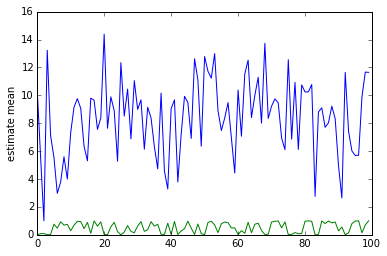

In [60]:
# choose the first point first
estimate = s[0] 
updateList = []
kernelList = []
updateList.append(estimate)
kernelList.append(0)

print "first point is ", estimate

# loop the whole dataset onece
for i in range(1,len(s)):
    sample = s[i] # look at one point at a time
    numerator = 0.0
    denominator = 0.0
    print "sample is ", sample
    # use kernel to do the update
    weight = simpleKernel(estimate,sample,sigma) 
    print "weight is ", weight
    kernelList.append(weight)
    numerator = weight * sample
    denominator = weight
    estimate = numerator * 1.0 /denominator
    print "estimate is ", estimate
    updateList.append(estimate)
print "final ", estimate  

# graph the previous dataset
import matplotlib.pyplot as plt
plt.plot(updateList)
plt.plot(kernelList)
plt.ylabel('estimate mean ')
plt.show()

In [72]:
import operator
import math

def closetPoint(pointList,s,e):
    distance = abs(s-e) # distance between sample and estimate
    if len(pointList)==0:
        pointList.append([s,distance])
    else:
        pointList.append([s,distance])
        # keep the 50 most closet point
        if len(pointList)== 101:
            pointList.sort(key=operator.itemgetter(1))
            pointList.pop()

In [46]:
# t = []
# closetPoint(t,2,1)
# closetPoint(t,3,1)
# closetPoint(t,1,1)
# print t

[[2, 1], [3, 2], [1, 0]]


In [73]:
# regernate data

print "second experiment "
mu, sigma = 10, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 5000)

second experiment 


first point is  12.8052698476
numerator  943.466026507
denominator  77.5534145345
estimate is  12.1653705665
numerator  1151.67970007
denominator  94.2937689528
estimate is  12.2137412987
numerator  1184.19357825
denominator  96.5355349298
estimate is  12.2669189031
numerator  1202.43642443
denominator  97.7305005679
estimate is  12.3035942458
numerator  1205.72542122
denominator  98.3161737816
estimate is  12.2637545262
numerator  1208.12395361
denominator  98.5765920279
estimate is  12.2556879758
numerator  1215.03717343
denominator  99.0088165492
estimate is  12.2720098652
numerator  1219.19580722
denominator  99.2173925341
estimate is  12.2881258626
numerator  1220.56406582
denominator  99.2970656588
estimate is  12.2920456684
numerator  1222.69004756
denominator  99.3756355036
estimate is  12.3037205384
numerator  1225.2174779
denominator  99.4331929012
estimate is  12.3220168452
numerator  1225.82635383
denominator  99.471931364
estimate is  12.3233392276
numerator  1227.08502943

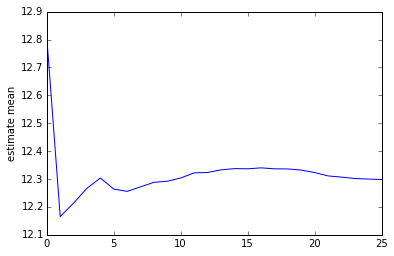

In [74]:
# look at 100 points, find the 50 points closet onece and update
lookAt = 200
closetList = [] # keep 50 closet one and then update
updateList = []

# choose the first point first
estimate = s[0] 
updateList.append(estimate)
print "first point is ", estimate

index = 1
# loop the whole dataset onece
while index < len(s):
# for i in range(1,len(s)):
    numerator = 0.0
    denominator = 0.0
    # look at 100 points
    for j in range(0,lookAt):
        sample = s[index] # look at one point at a time
        #print "sample is ", sample
        index = index + 1
        closetPoint(closetList,sample,estimate)
        if index >= len(s):
            break
    for item in closetList:
        samplePoint = item[0]
        # use kernel to do the update
        weight = simpleKernel(estimate,samplePoint,sigma) 
        numerator = numerator + weight * samplePoint
        denominator = denominator + weight
    # update
    print "numerator ", numerator
    print "denominator ", denominator
    estimate = numerator * 1.0 /denominator
    updateList.append(estimate)
    print "estimate is ", estimate
print "final ", estimate  

# graph the previous dataset
import matplotlib.pyplot as plt
plt.plot(updateList)
plt.ylabel('estimate mean ')
plt.show()

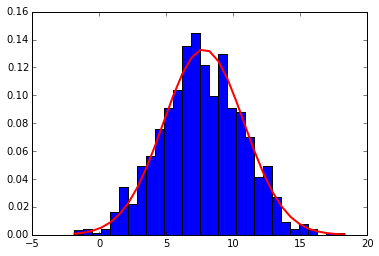

In [5]:
s.sort()
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()